In [1]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("hayabusa2_orbit_20201021.txt") as f:
    l = f.readlines()

# ファイルから各軌道データを取得
date = np.empty(0, str)
haya2 = np.empty((0, 3), float)
earth= np.empty((0, 3), float)
ryugu = np.empty((0, 3), float)
for i in range(19, len(l)):
    s = l[i].split()
    date = np.append(date, s[0])
    haya2 = np.append(haya2, np.array([[float(s[2]), float(s[3]), float(s[4])]]), axis=0)
    earth = np.append(earth, np.array([[float(s[5]), float(s[6]), float(s[7])]]), axis=0)
    ryugu = np.append(ryugu, np.array([[float(s[8]), float(s[9]), float(s[10])]]), axis=0)
    
# 相対位置の記録 #
haya2_e = haya2 - earth
ryugu_e = ryugu - earth
earth_h = earth - haya2
ryugu_h = ryugu - haya2
haya2_r = haya2 - ryugu
earth_r = earth - ryugu

In [3]:
# 太陽中心黄道面基準座標系での軌道を描画
def absoluteOrbit(i, ax, elems, offset=0):
    t = i + offset
    while elems: elems.pop().remove()
    ax.plot([haya2[t][0], haya2[t+1][0]], [haya2[t][1], haya2[t+1][1]], [haya2[t][2], haya2[t+1][2]], alpha=0.2, color='green', markersize=1)
    ax.plot([earth[t][0], earth[t+1][0]], [earth[t][1], earth[t+1][1]], [earth[t][2], earth[t+1][2]], alpha=0.2, color='blue', markersize=1)
    ax.plot([ryugu[t][0], ryugu[t+1][0]], [ryugu[t][1], ryugu[t+1][1]], [ryugu[t][2], ryugu[t+1][2]], alpha=0.2, color='brown', markersize=1)
    elems.append(ax.text(-2.2e8, 1.5e8, 2.7e8, date[t], fontsize=10))
    elems += ax.plot(haya2[t][0], haya2[t][1], haya2[t][2], color='green', markersize=5, marker='o', label="Hayabua2")
    elems += ax.plot(earth[t][0], earth[t][1], earth[t][2], color='blue', markersize=5, marker='o', label="Earth")
    elems += ax.plot(ryugu[t][0], ryugu[t][1], ryugu[t][2], color='brown', markersize=5, marker='o', label="Ryugu")
    ax.legend(frameon=False)

In [4]:
# 地球中心黄道面基準座標系での軌道を描画
def relative_e(i, ax, elems, offset=0):
    t = i + offset
    while elems: elems.pop().remove()
    ax.plot([haya2_e[t][0], haya2_e[t+1][0]], [haya2_e[t][1], haya2_e[t+1][1]], [haya2_e[t][2], haya2_e[t+1][2]], alpha=0.2, color='green', markersize=1)
    ax.plot([ryugu_e[t][0], ryugu_e[t+1][0]], [ryugu_e[t][1], ryugu_e[t+1][1]], [ryugu_e[t][2], ryugu_e[t+1][2]], alpha=0.2, color='brown', markersize=1)
    elems.append(ax.text(-5.2e8, 2.5e8, 5.7e8, date[t], fontsize=10))
    elems += ax.plot(haya2_e[t][0], haya2_e[t][1], haya2_e[t][2], color='green', markersize=5, marker='o', label="Hayabusa2")
    elems += ax.plot(ryugu_e[t][0], ryugu_e[t][1], ryugu_e[t][2], color='brown', markersize=5, marker='o', label="Ryugu")
    ax.legend(frameon=False)

In [5]:
# はやぶさ2中心軌道面基準座標系での軌道を描画
def relative_h(i, ax, elems, offset=0):
    t = i + offset
    while elems: elems.pop().remove()
    ax.plot([earth_h[t][0], earth_h[t+1][0]], [earth_h[t][1], earth_h[t+1][1]], [earth_h[t][2], earth_h[t+1][2]], alpha=0.2, color='blue', markersize=1)
    ax.plot([ryugu_h[t][0], ryugu_h[t+1][0]], [ryugu_h[t][1], ryugu_h[t+1][1]], [ryugu_h[t][2], ryugu_h[t+1][2]], alpha=0.2, color='brown', markersize=1)
    elems.append(ax.text(-2.2e8, 1.5e8, 2.7e8, date[t], fontsize=10))
    elems += ax.plot(earth_h[t][0], earth_h[t][1], earth_h[t][2], color='blue', markersize=5, marker='o', label="Earth")
    elems += ax.plot(ryugu_h[t][0], ryugu_h[t][1], ryugu_h[t][2], color='brown', markersize=5, marker='o', label="Ryugu")
    ax.legend(frameon=False)

In [6]:
# りゅうぐう中心軌道面基準座標系での軌道を描画
def relative_r(i, ax, elems, offset=0):
    t = i + offset
    while elems: elems.pop().remove()
    ax.plot([haya2_r[t][0], haya2_r[t+1][0]], [haya2_r[t][1], haya2_r[t+1][1]], [haya2_r[t][2], haya2_r[t+1][2]], alpha=0.2, color='green', markersize=1)
    ax.plot([earth_r[t][0], earth_r[t+1][0]], [earth_r[t][1], earth_r[t+1][1]], [earth_r[t][2], earth_r[t+1][2]], alpha=0.2, color='blue', markersize=1)
    elems.append(ax.text(-2.2e8, 1.5e8, 2.7e8, date[t], fontsize=10))
    elems += ax.plot(haya2_r[t][0], haya2_r[t][1], haya2_r[t][2], color='green', markersize=5, marker='o', label="Hayabusa2")
    elems += ax.plot(earth_r[t][0], earth_r[t][1], earth_r[t][2], color='blue', markersize=5, marker='o', label="Earth")
    ax.legend(frameon=False)

## 太陽中心黄道面基準座標系
### 往路

<IPython.core.display.Javascript object>


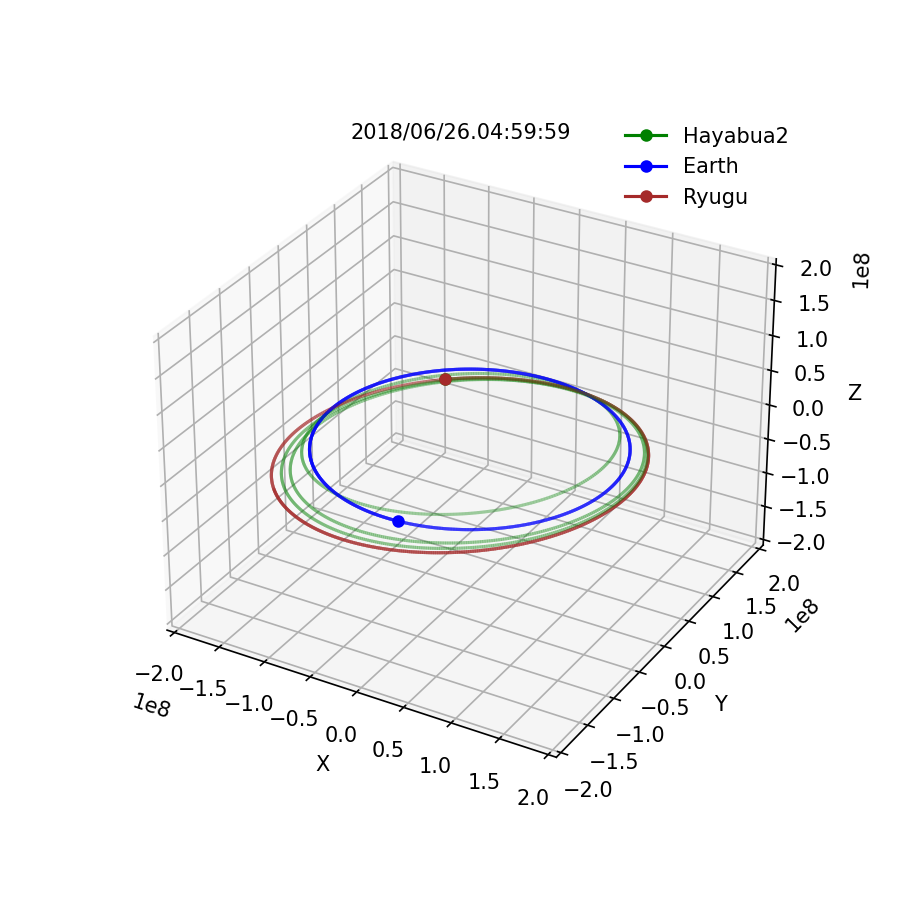

In [7]:
fig_go = plt.figure(figsize=(6,6))
ax_go = fig_go.add_subplot(111, projection='3d')
ax_go.set_xlim(-2e8, 2e8)
ax_go.set_ylim(-2e8, 2e8)
ax_go.set_zlim(-2e8, 2e8)
ax_go.set_xlabel("X",fontsize=10)
ax_go.set_ylabel("Y",fontsize=10)
ax_go.set_zlabel("Z",fontsize=10)
elems_go = []
if(False):
    for i in range(1302): absoluteOrbit(i, ax_go, elems_go)
else:
    ani = anm.FuncAnimation(fig_go, absoluteOrbit, fargs=(ax_go, elems_go, 0), frames=1302, interval=1, repeat=False)
    plt.show()
    ani.save('absoluteOrbit.gif', writer="ffmpeg",dpi=100)

## 復路

<IPython.core.display.Javascript object>


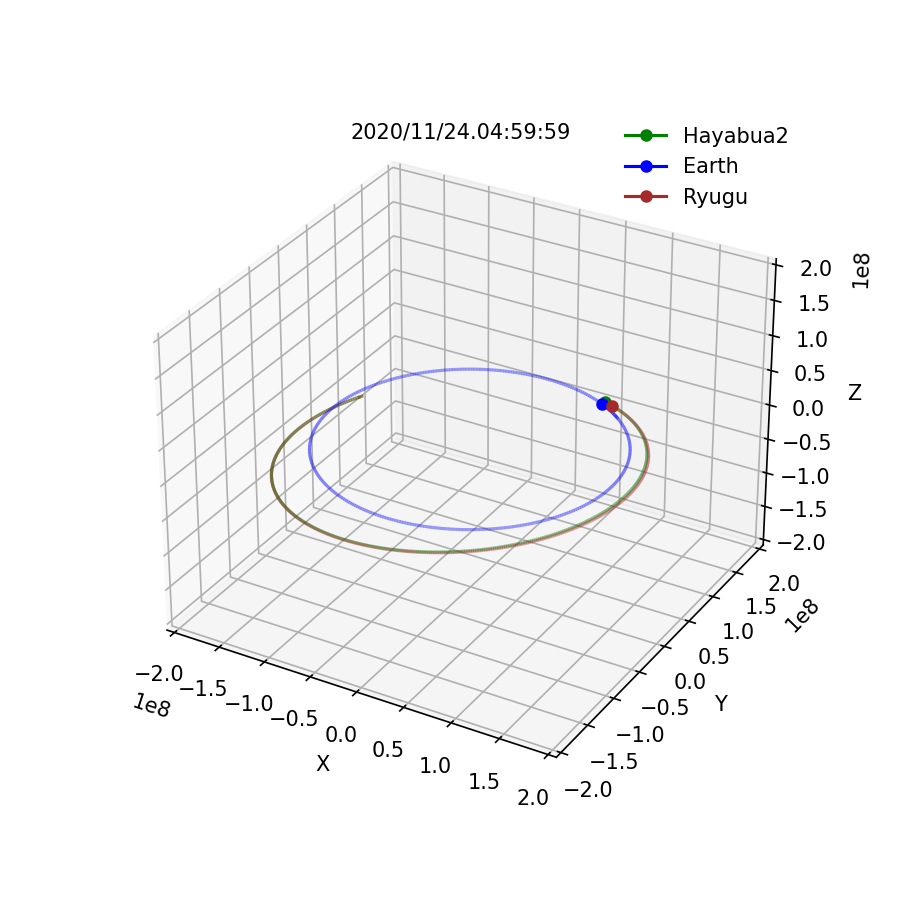

In [8]:
fig_back = plt.figure(figsize=(6,6))
ax_back = fig_back.add_subplot(111, projection='3d')
ax_back.set_xlim(-2e8, 2e8)
ax_back.set_ylim(-2e8, 2e8)
ax_back.set_zlim(-2e8, 2e8)
ax_back.set_xlabel("X",fontsize=10)
ax_back.set_ylabel("Y",fontsize=10)
ax_back.set_zlabel("Z",fontsize=10) 
elems_back = []
if(False):
    for i in range(1806, len(date)-1): absoluteOrbit(i, ax_back, elems_back)
else:
    ani = anm.FuncAnimation(fig_back, absoluteOrbit, fargs=(ax_back, elems_back, 1806), frames=len(date)-1-1806, interval=1, repeat=False)
    plt.show()
    ani.save('absoluteOrbit_back.gif', writer="ffmpeg",dpi=100)

# 地球基準座標黄道面基準座標系
## 往路

<IPython.core.display.Javascript object>


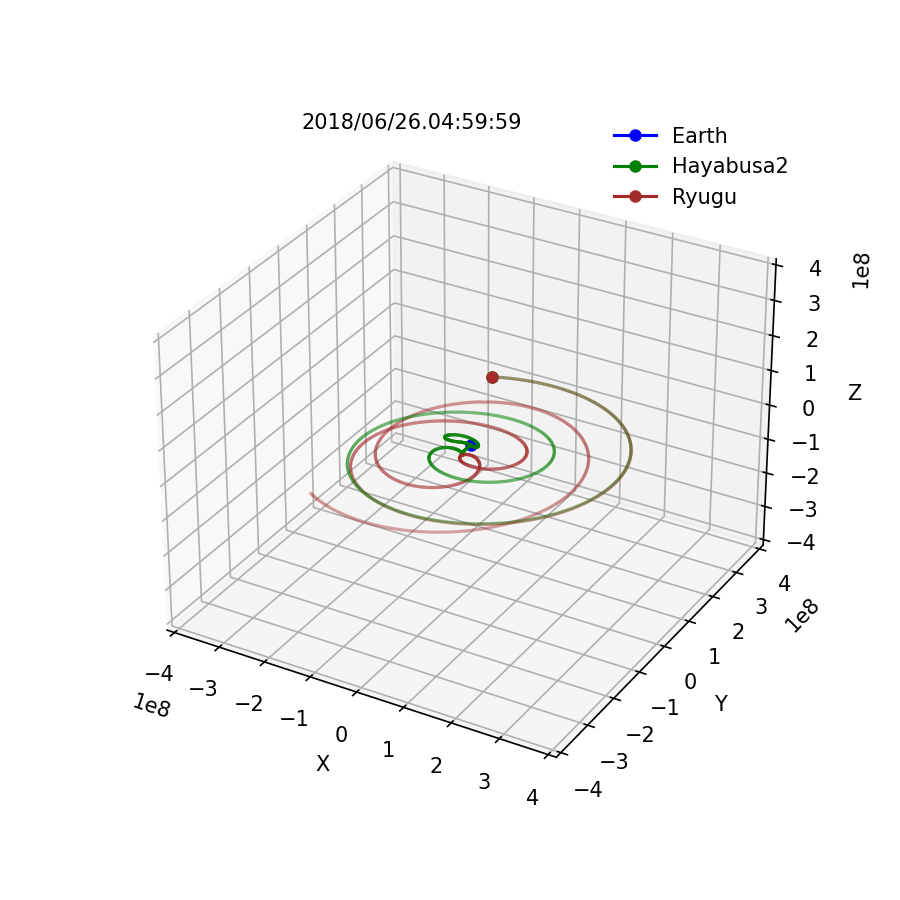

In [9]:
fig_e = plt.figure(figsize=(6,6))
ax_e = fig_e.add_subplot(111, projection='3d')
ax_e.set_xlim(-4e8, 4e8)
ax_e.set_ylim(-4e8, 4e8)
ax_e.set_zlim(-4e8, 4e8)
ax_e.set_xlabel("X",fontsize=10)
ax_e.set_ylabel("Y",fontsize=10)
ax_e.set_zlabel("Z",fontsize=10) 
ax_e.plot(0, 0, 0, color='blue', markersize=5, marker='o', label="Earth")
elems_e = []
if(False):
    for i in range(1302): relative_e(i, ax_e, elems_e)
else:
    ani = anm.FuncAnimation(fig_e, relative_e, fargs=(ax_e, elems_e, 0), frames=1302, interval=1, repeat=False)
    plt.show()
    ani.save('relative_e.gif', writer="ffmpeg",dpi=100)

## 復路

<IPython.core.display.Javascript object>


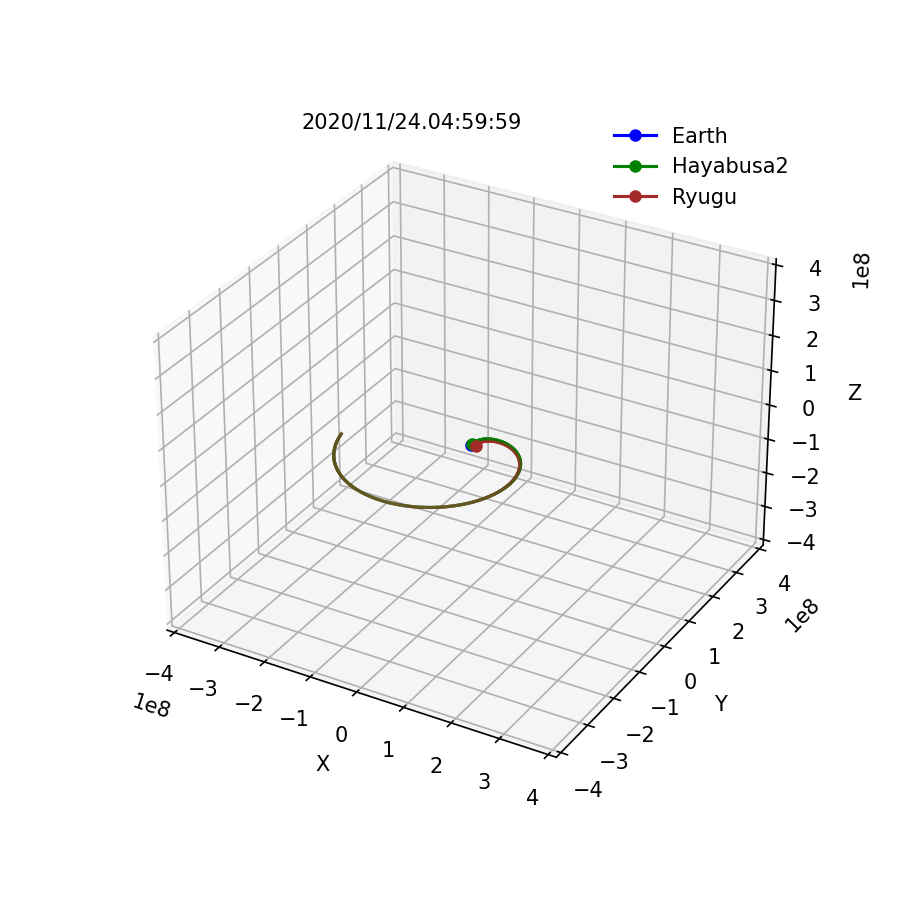

In [10]:
fig_e_b = plt.figure(figsize=(6,6))
ax_e_b = fig_e_b.add_subplot(111, projection='3d')
ax_e_b.set_xlim(-4e8, 4e8)
ax_e_b.set_ylim(-4e8, 4e8)
ax_e_b.set_zlim(-4e8, 4e8)
ax_e_b.set_xlabel("X",fontsize=10)
ax_e_b.set_ylabel("Y",fontsize=10)
ax_e_b.set_zlabel("Z",fontsize=10) 
ax_e_b.plot(0, 0, 0, color='blue', markersize=5, marker='o', label="Earth")
elems_e_b = []
if(False):
    for i in range(1806, len(data)-1-1806): relative_e(i, ax_e_b, elems_e_b)
else:
    ani = anm.FuncAnimation(fig_e_b, relative_e, fargs=(ax_e_b, elems_e_b, 1806), frames=len(date)-1-1806, interval=1, repeat=False)
    plt.show()
    ani.save('relative_e_b.gif', writer="ffmpeg",dpi=100)

# はやぶさ2基準座標系
## 往路

<IPython.core.display.Javascript object>


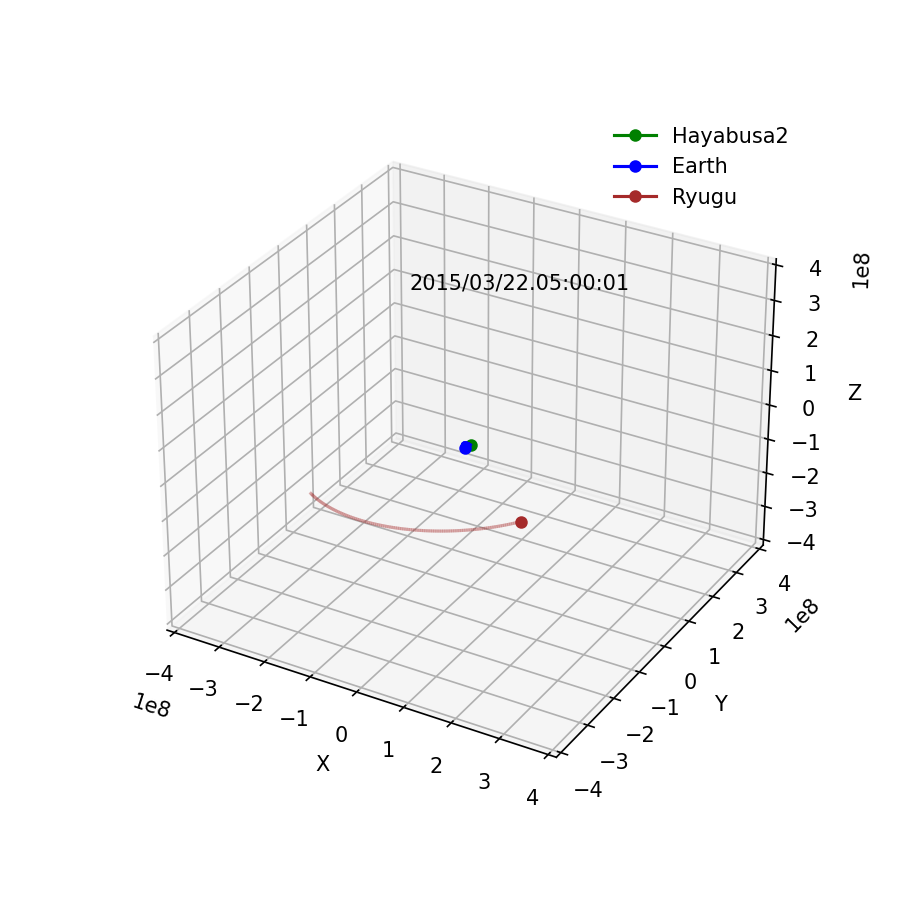

In [15]:
fig_h = plt.figure(figsize=(6,6))
ax_h = fig_h.add_subplot(111, projection='3d')
ax_h.set_xlim(-4e8, 4e8)
ax_h.set_ylim(-4e8, 4e8)
ax_h.set_zlim(-4e8, 4e8)
ax_h.set_xlabel("X",fontsize=10)
ax_h.set_ylabel("Y",fontsize=10)
ax_h.set_zlabel("Z",fontsize=10) 
ax_h.plot(0, 0, 0, color='green', markersize=5, marker='o', label="Hayabusa2")
elems_h = []
if(False):
    for i in range(1302): relative_h(i, ax_h, elems_h)
else:
    ani = anm.FuncAnimation(fig_h, relative_h, fargs=(ax_h, elems_h, 0), frames=1302, interval=1, repeat=False)
    plt.show()
    #ani.save('relative_h.mp4', writer="ffmpeg",dpi=100)

## 復路

<IPython.core.display.Javascript object>


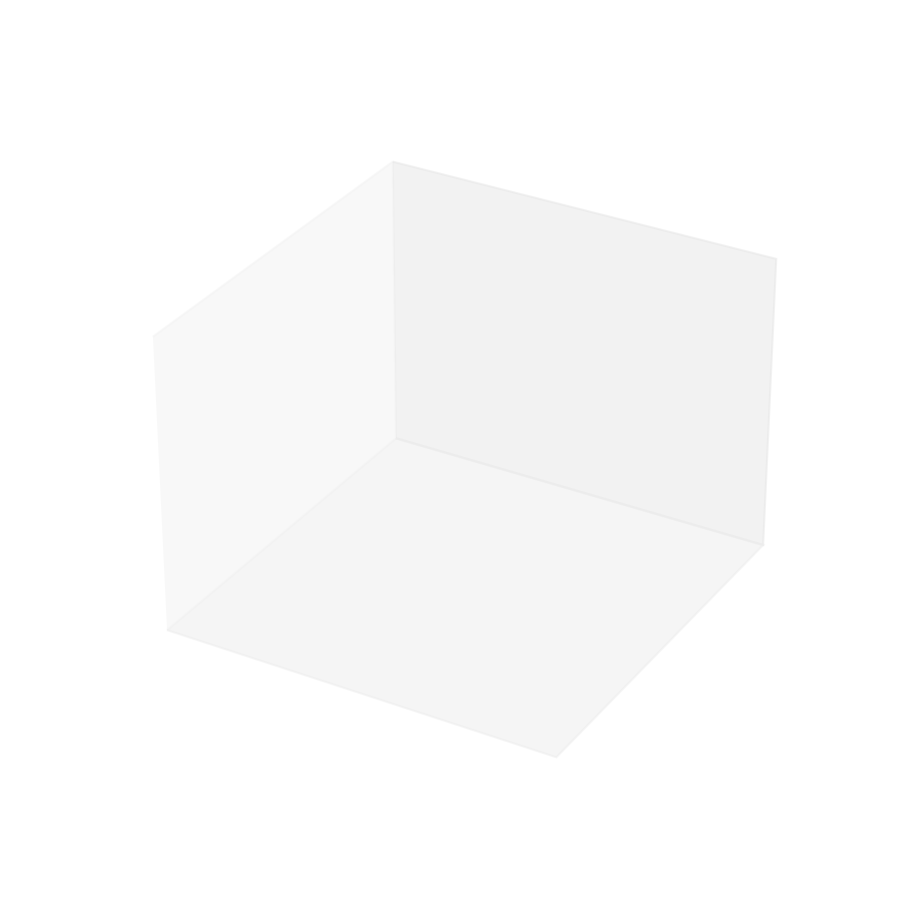

In [16]:
fig_h_b = plt.figure(figsize=(6,6))
ax_h_b = fig_h_b.add_subplot(111, projection='3d')
ax_h_b.set_xlim(-2e8, 3e8)
ax_h_b.set_ylim(-2e8, 3e8)
ax_h_b.set_zlim(-2e8, 3e8)
ax_h_b.set_xlabel("X",fontsize=10)
ax_h_b.set_ylabel("Y",fontsize=10)
ax_h_b.set_zlabel("Z",fontsize=10) 
ax_h_b.plot(0, 0, 0, color='green', markersize=5, marker='o', label="Hayabusa2")
elems_h_b = []
if(False):
    for i in range(1302): relative_h(i, ax_h_b, elems_h_b)
else:
    ani = anm.FuncAnimation(fig_h_b, relative_h, fargs=(ax_h_b, elems_h_b, 1806), frames=len(date)-1-1806, interval=1, repeat=False)
    plt.show()
    #ani.save('relative_h_b.mp4', writer="ffmpeg",dpi=100)

# りゅうぐう基準座標系
## 往路

<IPython.core.display.Javascript object>


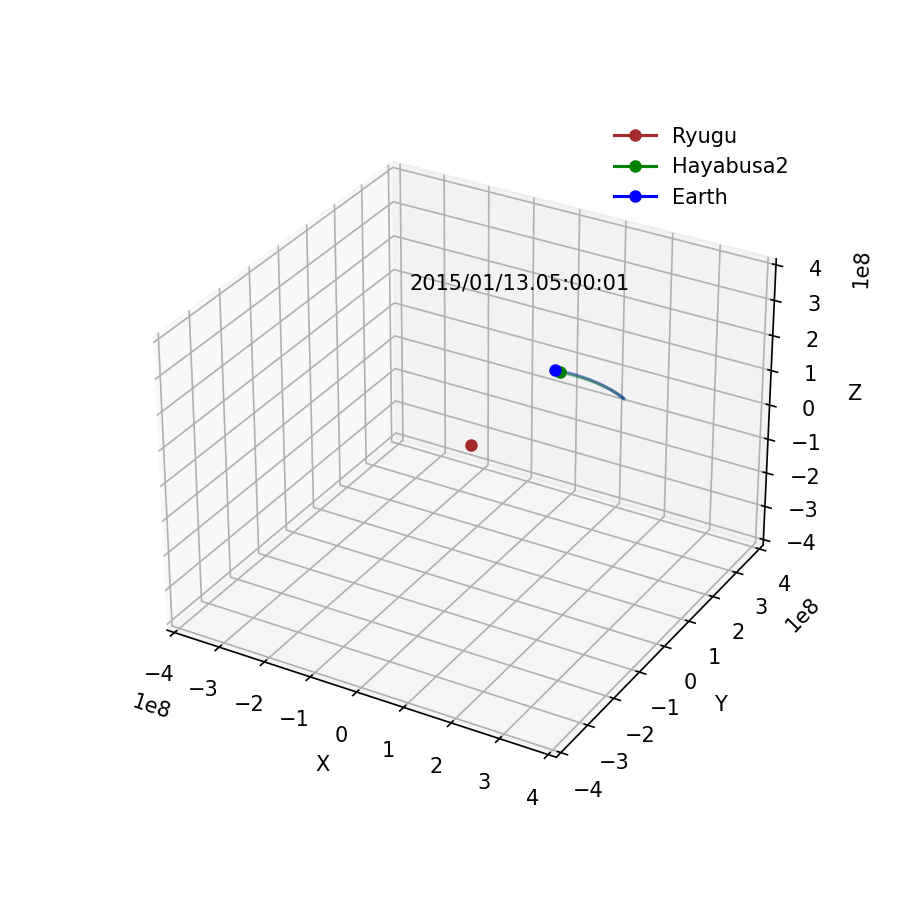

In [17]:
fig_r = plt.figure(figsize=(6,6))
ax_r = fig_r.add_subplot(111, projection='3d')
ax_r.set_xlim(-4e8, 4e8)
ax_r.set_ylim(-4e8, 4e8)
ax_r.set_zlim(-4e8, 4e8)
ax_r.set_xlabel("X",fontsize=10)
ax_r.set_ylabel("Y",fontsize=10)
ax_r.set_zlabel("Z",fontsize=10) 
ax_r.plot(0, 0, 0, color='brown', markersize=5, marker='o', label="Ryugu")
elems_r = []
if(False):
    for i in range(1302): relative_h(i, ax_r, elems_r)
else:
    ani = anm.FuncAnimation(fig_r, relative_r, fargs=(ax_r, elems_r, 0), frames=1302, interval=1, repeat=False)
    plt.show()
    #ani.save('relative_r.gif', writer="ffmpeg",dpi=100)

## 復路

<IPython.core.display.Javascript object>


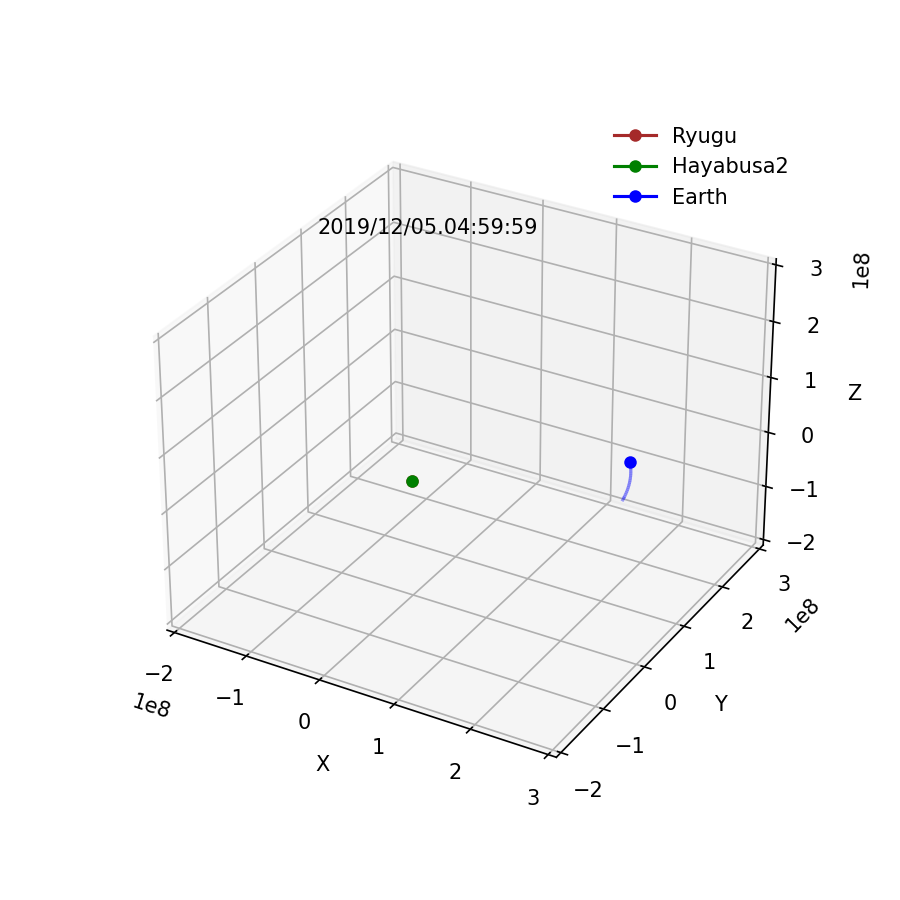

In [18]:
fig_r_b = plt.figure(figsize=(6,6))
ax_r_b = fig_r_b.add_subplot(111, projection='3d')
ax_r_b.set_xlim(-2e8, 3e8)
ax_r_b.set_ylim(-2e8, 3e8)
ax_r_b.set_zlim(-2e8, 3e8)
ax_r_b.set_xlabel("X",fontsize=10)
ax_r_b.set_ylabel("Y",fontsize=10)
ax_r_b.set_zlabel("Z",fontsize=10) 
ax_r_b.plot(0, 0, 0, color='brown', markersize=5, marker='o', label="Ryugu")
elems_r_b = []
if(False):
    for i in range(1302): relative_r(i, ax_h_r, elems_r_b)
else:
    ani = anm.FuncAnimation(fig_r_b, relative_r, fargs=(ax_r_b, elems_r_b, 1806), frames=len(date)-1-1806, interval=1, repeat=False)
    plt.show()
    #ani.save('relative_r_b.gif', writer="ffmpeg",dpi=100)